# 035039_RAC_Project

#### - Subham Raj (BDA-03)

#### Dependencies

In [1]:
pip install dash plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install jupyter-dash

In [3]:
import pandas as pd, numpy as np # For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets 
import scipy.stats as sps # For Probability & Inferential Statistics
import statsmodels as sm, statsmodels.formula.api as smf # For Descriptive Statistics & Regression
import dash_bootstrap_components as dbc
import plotly.express as px
from dash import dash, html, dcc, Input, Output
from jupyter_dash import JupyterDash
import seaborn as sns
import plotly.graph_objs as go
import seaborn as sns
import matplotlib.pyplot as plt
from dash.dependencies import Input, Output

#### Data Loading

In [4]:
df=pd.read_csv(r"C:\Users\Subham Raj\Documents\1_FORE\Term 3\MLP\RAC\RAC_Datset.csv")
df

,Customer_Number,Customer_Status,Age,Gender,Number_of_Dependents,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Use,Credit_Limit,Yearly_Average_Balance,Yearly_Transaction_Amount,Total_Transactions
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,12691.0,777,1144,42
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,8256.0,864,1291,33
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,3418.0,0,1887,20
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3313.0,2517,1171,20
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,4716.0,0,816,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,4003.0,1851,15476,117
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4277.0,2186,8764,69
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5409.0,0,10291,60
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,5281.0,0,8395,62


In [5]:
df1 = df.sample(n=1000, random_state=35039) 
df1

,Customer_Number,Customer_Status,Age,Gender,Number_of_Dependents,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Use,Credit_Limit,Yearly_Average_Balance,Yearly_Transaction_Amount,Total_Transactions
8243,714032883,Existing Customer,45,M,2,College,Unknown,$40K - $60K,Blue,36,4718.0,1591,4598,80
7455,770909433,Existing Customer,50,F,2,College,Married,$40K - $60K,Blue,37,3600.0,1904,4946,75
3329,716971833,Existing Customer,40,F,2,Uneducated,Married,Unknown,Blue,29,13126.0,0,4496,61
2210,789050883,Existing Customer,33,F,2,Doctorate,Single,Unknown,Blue,21,5297.0,0,2655,62
1441,712489158,Existing Customer,36,F,0,Uneducated,Single,Unknown,Blue,18,3667.0,948,2781,59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,716625033,Attrited Customer,32,F,1,Graduate,Single,Less than $40K,Blue,36,2761.0,0,2753,43
6132,714228558,Existing Customer,40,M,3,High School,Single,$80K - $120K,Blue,36,3624.0,0,4749,82
9253,712412958,Existing Customer,41,F,3,Doctorate,Married,$40K - $60K,Silver,33,18266.0,822,14615,124
4310,713231658,Existing Customer,45,F,2,Doctorate,Single,Less than $40K,Blue,33,5553.0,1117,3744,52


In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 8243 to 8873
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Customer_Number            1000 non-null   int64  
 1   Customer_Status            1000 non-null   object 
 2   Age                        1000 non-null   int64  
 3   Gender                     1000 non-null   object 
 4   Number_of_Dependents       1000 non-null   int64  
 5   Education_Level            1000 non-null   object 
 6   Marital_Status             1000 non-null   object 
 7   Income_Category            1000 non-null   object 
 8   Card_Category              1000 non-null   object 
 9   Months_on_Use              1000 non-null   int64  
 10  Credit_Limit               1000 non-null   float64
 11  Yearly_Average_Balance     1000 non-null   int64  
 12  Yearly_Transaction_Amount  1000 non-null   int64  
 13  Total_Transactions         1000 non-null   in

In [7]:
# define the age categories
age_bins = [0, 30, 40, 60, 70, 80, 90]

# use cut() to create the age category column
df1['Age_Category'] = pd.cut(df1['Age'], bins=age_bins, labels=['<30', '30-39', '40-49', '50-59', '60-69', '70-79'])

pd.DataFrame(df1)

,Customer_Number,Customer_Status,Age,Gender,Number_of_Dependents,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_Use,Credit_Limit,Yearly_Average_Balance,Yearly_Transaction_Amount,Total_Transactions,Age_Category
8243,714032883,Existing Customer,45,M,2,College,Unknown,$40K - $60K,Blue,36,4718.0,1591,4598,80,40-49
7455,770909433,Existing Customer,50,F,2,College,Married,$40K - $60K,Blue,37,3600.0,1904,4946,75,40-49
3329,716971833,Existing Customer,40,F,2,Uneducated,Married,Unknown,Blue,29,13126.0,0,4496,61,30-39
2210,789050883,Existing Customer,33,F,2,Doctorate,Single,Unknown,Blue,21,5297.0,0,2655,62,30-39
1441,712489158,Existing Customer,36,F,0,Uneducated,Single,Unknown,Blue,18,3667.0,948,2781,59,30-39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4740,716625033,Attrited Customer,32,F,1,Graduate,Single,Less than $40K,Blue,36,2761.0,0,2753,43,30-39
6132,714228558,Existing Customer,40,M,3,High School,Single,$80K - $120K,Blue,36,3624.0,0,4749,82,30-39
9253,712412958,Existing Customer,41,F,3,Doctorate,Married,$40K - $60K,Silver,33,18266.0,822,14615,124,40-49
4310,713231658,Existing Customer,45,F,2,Doctorate,Single,Less than $40K,Blue,33,5553.0,1117,3744,52,40-49


#### Data Processing 

In [8]:
df1.columns

Index(['Customer_Number', 'Customer_Status', 'Age', 'Gender',
       'Number_of_Dependents', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_Use', 'Credit_Limit',
       'Yearly_Average_Balance', 'Yearly_Transaction_Amount',
       'Total_Transactions', 'Age_Category'],
      dtype='object')

In [9]:
df1_cat = df1[['Customer_Status', 
               'Gender', 
               'Education_Level', 
               'Marital_Status',
               'Income_Category', 
               'Card_Category', 
               'Age_Category']]

df1_noncat = df1[['Age', 
                  'Number_of_Dependents',
                  'Months_on_Use', 
                  'Credit_Limit', 
                  'Yearly_Average_Balance', 
                  'Yearly_Transaction_Amount',
                  'Total_Transactions']]

In [10]:
df1_noncat.describe()

,Age,Number_of_Dependents,Months_on_Use,Credit_Limit,Yearly_Average_Balance,Yearly_Transaction_Amount,Total_Transactions
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,46.325000,2.358000,36.064000,8318.882100,1161.730000,4425.587000,65.17400
std,7.841866,1.268639,7.806462,8880.609527,804.271305,3412.182866,23.57625
min,26.000000,0.000000,13.000000,1438.300000,0.000000,647.000000,12.00000
25%,41.000000,1.000000,31.000000,2570.750000,596.750000,2124.250000,45.00000
50%,46.000000,2.000000,36.000000,4271.000000,1217.000000,3913.000000,68.00000
75%,51.000000,3.000000,41.000000,9926.750000,1776.000000,4802.250000,81.00000
max,65.000000,5.000000,56.000000,34516.000000,2517.000000,17258.000000,134.00000


In [11]:
#df1_noncat_stats = sm.stats.descriptivestats.Description(df1_noncat).frame
#df1_noncat_stats

### Descriptive statistics of categorical variables 

In [12]:
gender_stats = pd.concat([df1_cat['Gender'].value_counts(), df1_cat['Gender'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
gender_stats

,count,percentage
F,544,54.0
M,456,46.0


In [13]:
customer_status_stats = pd.concat([df1_cat['Customer_Status'].value_counts(), df1_cat['Customer_Status'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
customer_status_stats

,count,percentage
Existing Customer,849,85.0
Attrited Customer,151,15.0


In [14]:
Education_Level_stats = pd.concat([df1_cat['Education_Level'].value_counts(), df1_cat['Education_Level'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
Education_Level_stats

,count,percentage
Graduate,305,30.0
High School,193,19.0
Uneducated,157,16.0
Unknown,144,14.0
College,93,9.0
Post-Graduate,60,6.0
Doctorate,48,5.0


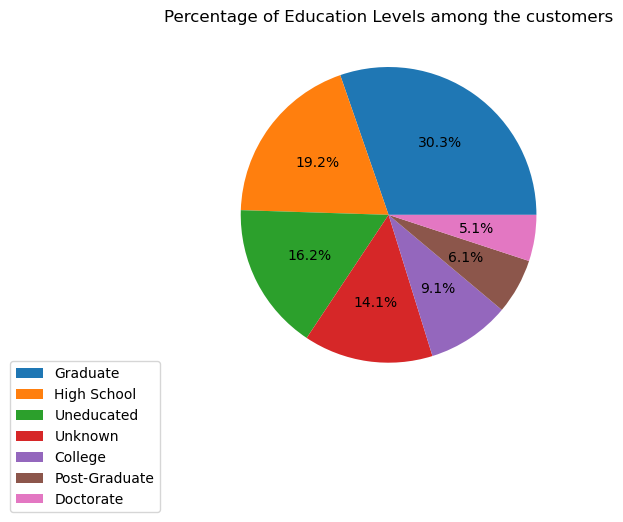

In [15]:
Education_Level_stats['Education_Level']= Education_Level_stats.index
labels = Education_Level_stats.Education_Level
values = Education_Level_stats.percentage
plt.pie(values, autopct='%1.1f%%', radius=1)
plt.title('Percentage of Education Levels among the customers')
plt.legend(labels, loc='center right', bbox_to_anchor=[-0.1,-0.1])
plt.show()

In [16]:
Marital_Status_stats = pd.concat([df1_cat['Marital_Status'].value_counts(), df1_cat['Marital_Status'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
Marital_Status_stats

,count,percentage
Married,441,44.0
Single,410,41.0
Unknown,77,8.0
Divorced,72,7.0


In [17]:
Income_Category_stats = pd.concat([df1_cat['Income_Category'].value_counts(), df1_cat['Income_Category'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
Income_Category_stats

,count,percentage
Less than $40K,367,37.0
$40K - $60K,159,16.0
$80K - $120K,146,15.0
$60K - $80K,137,14.0
Unknown,117,12.0
More than $120K,74,7.0


In [18]:
Card_Category_stats = pd.concat([df1_cat['Card_Category'].value_counts(), df1_cat['Card_Category'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
Card_Category_stats

,count,percentage
Blue,944,94.0
Silver,45,4.0
Gold,9,1.0
Platinum,2,0.0


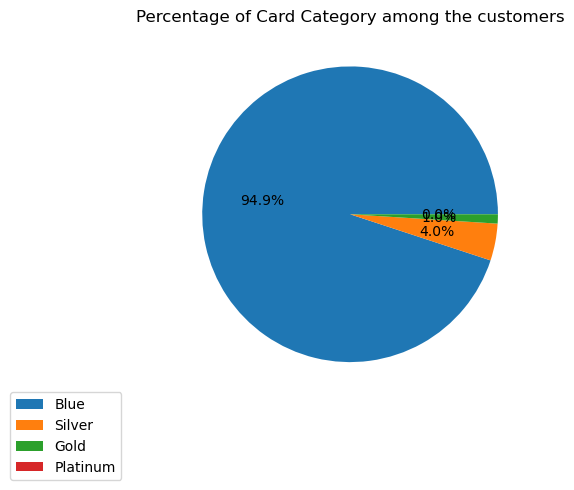

In [19]:
Card_Category_stats['Card_Category']= Card_Category_stats.index
labels = Card_Category_stats.Card_Category
values = Card_Category_stats.percentage
plt.pie(values, autopct='%1.1f%%', radius=1)
plt.title('Percentage of Card Category among the customers')
plt.legend(labels, loc='center right', bbox_to_anchor=[-0.1,-0.1])

plt.show()

In [20]:
age_stats = pd.concat([df1_cat['Age_Category'].value_counts(), df1_cat['Age_Category'].value_counts(normalize=True).mul(100).round(0)], axis=1, keys=('count','percentage'))
age_stats

,count,percentage
40-49,736,74.0
30-39,208,21.0
50-59,33,3.0
<30,23,2.0
60-69,0,0.0
70-79,0,0.0


### Pivot tables

In [21]:
pivot1 = pd.pivot_table(df1, index='Age_Category', columns='Income_Category', values='Credit_Limit', aggfunc='mean')
pivot1

Income_Category,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,More than $120K,Unknown
Age_Category,,,,,,
<30,3800.000000,11545.000000,34516.000000,3065.573333,NaN,4355.666667
30-39,4487.424242,9189.518750,15456.292000,3554.505405,23126.888889,9020.771429
40-49,5303.574576,11209.692857,15034.708403,3746.090458,18790.661538,9079.054054
50-59,5977.050000,8238.200000,8851.000000,4245.556250,NaN,7422.460000


In [22]:
pivot2 = pd.pivot_table(df1, index='Card_Category', columns='Income_Category', values='Credit_Limit', aggfunc='mean')
pivot2

Income_Category,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,More than $120K,Unknown
Card_Category,,,,,,
Blue,4469.252318,8444.899194,14078.091304,3307.626705,17977.044118,7542.20991
Gold,22722.000000,34516.000000,NaN,15987.000000,34516.000000,NaN
Platinum,NaN,34516.000000,NaN,NaN,34516.000000,NaN
Silver,17112.857143,30184.888889,34516.000000,11835.363636,34516.000000,33428.50000


In [23]:
pivot3 = pd.pivot_table(df1, index='Marital_Status', columns='Income_Category', values='Credit_Limit', aggfunc='mean')
pivot3

Income_Category,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,More than $120K,Unknown
Marital_Status,,,,,,
Divorced,5675.000000,13567.636364,14585.400000,3177.793548,14289.333333,10629.666667
Married,4575.773239,10084.440000,15108.000000,3891.490062,17564.677419,9053.720000
Single,6011.286364,10344.011765,15194.106452,3647.410000,20231.466667,8311.201961
Unknown,3249.525000,12461.830000,15758.687500,3450.744000,27478.571429,9361.714286


In [24]:
pivot4 = pd.pivot_table(df1, index='Number_of_Dependents', columns='Income_Category', values='Credit_Limit', aggfunc='mean')
pivot4

Income_Category,$40K - $60K,$60K - $80K,$80K - $120K,Less than $40K,More than $120K,Unknown
Number_of_Dependents,,,,,,
0,6733.588889,11487.375000,22470.500000,3265.738636,26733.500000,6551.400000
1,3713.473333,11082.105263,13880.130435,3570.615873,13438.277778,8750.345833
2,5803.804878,9711.827451,14794.094286,3778.018947,20041.500000,8552.062500
3,6141.177778,11258.766667,15122.680435,3842.417708,17555.933333,9810.846154
4,3786.392593,11207.320000,15894.500000,3412.392308,25251.333333,9753.750000
5,4117.285714,7411.000000,5494.500000,4973.647059,34516.000000,7682.200000


### Generate Cards and averages

In [25]:
#Get overall total for units ordered and product sales 
def column_total1(df,columns):
    return df[columns].sum(axis=0)

df1_columns = ['Yearly_Transaction_Amount']
df1_total = column_total1(df1, df1_columns)
print('Overall:',df1_total)

def column_total2(df,columns):
    return df[columns].count()
df1_columns_count = df1['Customer_Number'].count()

def column_total3(df,columns):
    return df[columns].sum(axis=0)

df1_columns = ['Total_Transactions' ]
df1_total = column_total3(df1, df1_columns)
print('Overall:',df1_total)

print('Total Customers:',df1_columns_count)

Overall: Yearly_Transaction_Amount    4425587
dtype: int64
Overall: Total_Transactions    65174
dtype: int64
Total Customers: 1000


In [26]:
def generate_card_content(card_header, overall_value):
    card_head_style = {'textAlign':'center','fontSize':'150%'}
    card_body_style = {'textAlign':'center','fontSize':'200%'}
    card_header = dbc.CardHeader(card_header,style=card_head_style)
    card_body = dbc.CardBody(
        [
            html.H5(f"{int(overall_value):,}", className="card-title",style=card_body_style),
            html.P(
                #"Overall: {:,}".format(overall_value[0].iloc[0]),
                className="card-text",style={'textAlign':'center'}
            ),
        ]
    )
    card = [card_header,card_body]
    return card

In [27]:
def generate_cards():
    df = pd.read_csv(r"C:\Users\Prabhleen Kaur Pahwa\Documents\1_FORE\Term 3\MLP\RAC\RAC_Datset.csv", encoding='cp1252')
    df_column1 = ['Customer_Number']
    df_column2 = ['Total_Transactions']
    df_column3 = ['Yearly_Transaction_Amount']
    df_total1 = df1['Customer_Number'].count()
    df_total1 = df_total1.astype(float)
    df_total2 = column_total2(df, df_column2).sum()
    df_total2 = df_total2.astype(float)
    df_total3 = column_total3(df, df_column3).sum()
    df_total3 = df_total3.astype(float)
    df_average1 = df_total2/df_total1
    df_average2 = df_total3/df_total1
    cards = html.Div(
        [
            dbc.Row(
                [
                    dbc.Col(dbc.Card(generate_card_content("Total Customers", df_total1), color="success", inverse=True),md=dict(size=2,offset=1)),
                    dbc.Col(dbc.Card(generate_card_content("Total Transactions", df_total2), color="success", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Total Yearly_Transaction_Amount", df_total3), color="success", inverse=True),md=dict(size=2)),
                    dbc.Col(dbc.Card(generate_card_content("Average Transaction per customer", df_average1), color="warning", inverse=True),md=dict(size=2)), 
                    dbc.Col(dbc.Card(generate_card_content("Average value per transaction", df_average2), color="warning", inverse=True),md=dict(size=2)),
                ],
                className="mb-4",
            ),
        ],id='card1'
    )
    return cards

#### Dash App

In [ ]:
# create Dash app
external_stylesheets = [dbc.themes.CYBORG]
app = dash.Dash(__name__, external_stylesheets=external_stylesheets)
app.title = 'Credit Card Dashboard'
colors = {'background': '#488A99', 'bodyColor':'#20283E', 'text': '#CED2CC'}

# define the layout
app.layout = html.Div([
    html.H1(children='CREDIT CARD DASHBOARD', style={'textAlign': 'center', 'color': colors['text'], 'backgroundColor': colors['background'],'font': {'size': 50}}), 
    html.H3(children='INCOME CATEGORY ANALYSIS', style={'textAlign':'center','color':colors['text'], 'backgroundColor': colors['background'], 'font': {'size': 40}}),
    html.Div(generate_cards()),
    html.H4([html.Label('SELECT THE AMOUNT')],id='my-div'+str(id),style={'textAlign':'center'}),
    dcc.Dropdown(
        id='Amount_dropdown',
        options=[{'label':'Months on Use', 'value':'Months_on_Use'}, 
                 {'label':'Credit Limits', 'value':'Credit_Limit'},
                 {'label':'Yearly Average Balance', 'value':'Yearly_Average_Balance'},
                 {'label':'Yearly Transaction Amount', 'value':'Yearly_Transaction_Amount'},
                 {'label':'Total Transactions', 'value':'Total_Transactions'}],
        value='Months_on_Use', searchable=False, placeholder="Select the type of amount"),
    dcc.Graph(id='bar-chart1'),
    dcc.Graph(id='bar-chart2'),
    dcc.Graph(id='bar-chart3'),
    dcc.Graph(id='bar-chart4')
])

# define the callback function for the bar chart
@app.callback(
    Output(component_id='bar-chart1', component_property='figure'),
    Input(component_id='Amount_dropdown',component_property= 'value')
)


def update_bar_chart1(value):
    if value == 'Months_on_Use':
        # Calculate the total Months_on_Use for each age and income category
        Months_on_Use = df1.groupby(['Age_Category', 'Income_Category'])['Months_on_Use'].count().reset_index()
        Months_on_Use = pd.pivot_table(Months_on_Use, index='Age_Category', columns='Income_Category', values='Months_on_Use', aggfunc='sum')
        fig = px.bar(Months_on_Use, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', 
                          yaxis=dict(title='Months on Use'),
                          title={
        'text': 'Total Months_on_Use by Age Category and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Credit_Limit':
        # Calculate the total Credit_Limit for each age and income category
        Credit_limit = df1.groupby(['Age_Category', 'Income_Category'])['Credit_Limit'].sum().reset_index()
        Credit_limit = pd.pivot_table(Credit_limit, index='Age_Category', columns='Income_Category', values='Credit_Limit', aggfunc='sum')
        fig = px.bar(Credit_limit, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Credit Limit'),title={
        'text': 'Total Credit Limit by Age Category and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Yearly_Average_Balance':
        # Calculate the total Yearly_Average_Balance for each age and income category
        Yearly_Average_Balance = df1.groupby(['Age_Category', 'Income_Category'])['Yearly_Average_Balance'].sum().reset_index()
        Yearly_Average_Balance = pd.pivot_table(Yearly_Average_Balance, index='Age_Category', columns='Income_Category', values='Yearly_Average_Balance', aggfunc='sum')
        fig = px.bar(Yearly_Average_Balance, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Yearly Average Balance'), 
                          title={
        'text': 'Total Yearly Average Balance by Age Category and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Yearly_Transaction_Amount':
        # Calculate the total Yearly_Transaction_Amount for each age and income category
        Yearly_Transaction_Amount = df1.groupby(['Age_Category', 'Income_Category'])['Yearly_Transaction_Amount'].sum().reset_index()
        Yearly_Transaction_Amount = pd.pivot_table(Yearly_Transaction_Amount, index='Age_Category', columns='Income_Category', values='Yearly_Transaction_Amount', aggfunc='sum')
        fig = px.bar(Yearly_Transaction_Amount, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Yearly Transaction amount'),title={
        'text': 'Total Yearly Transaction Amount by Age Category and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Total_Transactions':
        # Calculate the total Total_Transactions for each age and income category
        Total_Transactions = df1.groupby(['Age_Category', 'Income_Category'])['Total_Transactions'].sum().reset_index()
        Total_Transactions = pd.pivot_table(Total_Transactions, index='Age_Category', columns='Income_Category', values='Total_Transactions', aggfunc='sum')
        fig = px.bar(Total_Transactions, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Total Transactions'), title={
        'text': 'Total Transactions by Age Category and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    else:
        fig = None  
    return fig




# define the callback function for the bar chart
@app.callback(
    Output(component_id='bar-chart2', component_property='figure'),
    Input(component_id='Amount_dropdown', component_property='value')
)
def update_bar_chart2(value):
    if value == 'Months_on_Use':
        # Calculate the total Months_on_Use for each Card_Category and income category
        Months_on_Use = df1.groupby(['Card_Category', 'Income_Category'])['Months_on_Use'].count().reset_index()
        Months_on_Use = pd.pivot_table(Months_on_Use, index='Card_Category', columns='Income_Category', values='Months_on_Use', aggfunc='sum')
        fig = px.bar(Months_on_Use, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', 
                          yaxis=dict(title='Months on Use'),
                          title={
        'text': 'Total Months_on_Use by Card Category and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Credit_Limit':
        # Calculate the total Credit_Limit for each Card_Category and income category
        Credit_Limit = df1.groupby(['Card_Category', 'Income_Category'])['Credit_Limit'].sum().reset_index()
        Credit_Limit = pd.pivot_table(Credit_Limit, index='Card_Category', columns='Income_Category', values='Credit_Limit', aggfunc='sum')
        fig = px.bar(Credit_Limit, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Credit Limit'), title={
        'text': 'Total Credit Limit by Card Category and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Yearly_Average_Balance':
        # Calculate the total Yearly_Average_Balance for each Card_Category and income category
        Yearly_Average_Balance = df1.groupby(['Card_Category', 'Income_Category'])['Yearly_Average_Balance'].sum().reset_index()
        Yearly_Average_Balance = pd.pivot_table(Yearly_Average_Balance, index='Card_Category', columns='Income_Category', values='Yearly_Average_Balance', aggfunc='sum')
        fig = px.bar(Yearly_Average_Balance, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Yearly Average Balance'),
                          title={
        'text': 'Total Yearly Average Balance by Card Category and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Yearly_Transaction_Amount':
        # Calculate the total Yearly_Transaction_Amount for each Card_Category and income category
        Yearly_Transaction_Amount = df1.groupby(['Card_Category', 'Income_Category'])['Yearly_Transaction_Amount'].sum().reset_index()
        Yearly_Transaction_Amount = pd.pivot_table(Yearly_Transaction_Amount, index='Card_Category', columns='Income_Category', values='Yearly_Transaction_Amount', aggfunc='sum')
        fig = px.bar(Yearly_Transaction_Amount, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Yearly transaction amount'), title={
        'text': 'Total Yearly Transaction amount by Card Category and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Total_Transactions':
        # Calculate the total Total_Transactions for each Card_Category and income category
        Total_Transactions = df1.groupby(['Card_Category', 'Income_Category'])['Total_Transactions'].sum().reset_index()
        Total_Transactions = pd.pivot_table(Total_Transactions, index='Card_Category', columns='Income_Category', values='Total_Transactions', aggfunc='sum')
        fig = px.bar(Total_Transactions, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Total Transactions'),title={
        'text': 'Total Transactions by Card Category and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    else:
        fig = None  
    return fig


@app.callback(
    Output(component_id='bar-chart3', component_property='figure'),
    Input(component_id='Amount_dropdown', component_property='value')
)
def update_bar_chart3(value):
    if value == 'Months_on_Use':
        # Calculate the total Months_on_Use for each Number_of_Dependents and income category
        Months_on_Use = df1.groupby(['Number_of_Dependents', 'Income_Category'])['Months_on_Use'].count().reset_index()
        Months_on_Use = pd.pivot_table(Months_on_Use, index='Number_of_Dependents', columns='Income_Category', values='Months_on_Use', aggfunc='sum')
        fig = px.bar(Months_on_Use, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Months on Use'),
                          title={
        'text': 'Total Months_on_Use by No.of Dependents and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Credit_Limit':
        # Calculate the total Credit_Limit for each Number_of_Dependents and income category
        Credit_Limit = df1.groupby(['Number_of_Dependents', 'Income_Category'])['Credit_Limit'].sum().reset_index()
        Credit_Limit = pd.pivot_table(Credit_Limit, index='Number_of_Dependents', columns='Income_Category', values='Credit_Limit', aggfunc='sum')
        fig = px.bar(Credit_Limit, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Credit Limit'),
                          title={
        'text': 'Total Credit Limit by No.of Dependents and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Yearly_Average_Balance':
        # Calculate the total Yearly_Average_Balance for each Number_of_Dependents and income category
        Yearly_Average_Balance = df1.groupby(['Number_of_Dependents', 'Income_Category'])['Yearly_Average_Balance'].sum().reset_index()
        Yearly_Average_Balance = pd.pivot_table(Yearly_Average_Balance, index='Number_of_Dependents', columns='Income_Category', values='Yearly_Average_Balance', aggfunc='sum')
        fig = px.bar(Yearly_Average_Balance, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Yearly Average Balance'),
                          title={
        'text': 'Total Yearly average balance by No.of Dependents and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Yearly_Transaction_Amount':
        # Calculate the total Yearly_Transaction_Amount for each Number_of_Dependents and income category
        Yearly_Transaction_Amount = df1.groupby(['Number_of_Dependents', 'Income_Category'])['Yearly_Transaction_Amount'].sum().reset_index()
        Yearly_Transaction_Amount = pd.pivot_table(Yearly_Transaction_Amount, index='Number_of_Dependents', columns='Income_Category', values='Yearly_Transaction_Amount', aggfunc='sum')
        fig = px.bar(Yearly_Transaction_Amount, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Yearly Transaction amount'), title={
        'text': 'Total yearly transaction amount by No.of Dependents and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Total_Transactions':
        # Calculate the total Total_Transactions for each Number_of_Dependents and income category
        Total_Transactions = df1.groupby(['Number_of_Dependents', 'Income_Category'])['Total_Transactions'].sum().reset_index()
        Total_Transactions = pd.pivot_table(Total_Transactions, index='Number_of_Dependents', columns='Income_Category', values='Total_Transactions', aggfunc='sum')
        fig = px.bar(Total_Transactions, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Total Transactions'), title={
        'text': 'Total transactions by No.of Dependents and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    else:
        fig = None  
    return fig


@app.callback(
    Output(component_id='bar-chart4', component_property='figure'),
    Input(component_id='Amount_dropdown', component_property='value')
)
def update_bar_chart4(value):
    if value == 'Months_on_Use':
        # Calculate the total Months_on_Use for each Marital_Status and income category
        Months_on_Use = df1.groupby(['Marital_Status', 'Income_Category'])['Months_on_Use'].count().reset_index()
        Months_on_Use = pd.pivot_table(Months_on_Use, index='Marital_Status', columns='Income_Category', values='Months_on_Use', aggfunc='sum')
        fig = px.bar(Months_on_Use, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Months on Use'),
                          title={
        'text': 'Total Months_on_Use by marital status and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Credit_Limit':
        # Calculate the total Credit_Limit for each Marital_Status and income category
        Credit_Limit = df1.groupby(['Marital_Status', 'Income_Category'])['Credit_Limit'].sum().reset_index()
        Credit_Limit = pd.pivot_table(Credit_Limit, index='Marital_Status', columns='Income_Category', values='Credit_Limit', aggfunc='sum')
        fig = px.bar(Credit_Limit, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Credit Limit'),
                          title={
        'text': 'Total Credit Limit by marital status and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Yearly_Average_Balance':
        # Calculate the total Yearly_Average_Balance for each Marital_Status and income category
        Yearly_Average_Balance = df1.groupby(['Marital_Status', 'Income_Category'])['Yearly_Average_Balance'].sum().reset_index()
        Yearly_Average_Balance = pd.pivot_table(Yearly_Average_Balance, index='Marital_Status', columns='Income_Category', values='Yearly_Average_Balance', aggfunc='sum')
        fig = px.bar(Yearly_Average_Balance, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Yearly Average Balance'),
                          title={
        'text': 'Total Yearly average balance by marital status and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Yearly_Transaction_Amount':
        # Calculate the total Yearly_Transaction_Amount for each Marital_Status and income category
        Yearly_Transaction_Amount = df1.groupby(['Marital_Status', 'Income_Category'])['Yearly_Transaction_Amount'].sum().reset_index()
        Yearly_Transaction_Amount = pd.pivot_table(Yearly_Transaction_Amount, index='Marital_Status', columns='Income_Category', values='Yearly_Transaction_Amount', aggfunc='sum')
        fig = px.bar(Yearly_Transaction_Amount, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Yearly transaction amount'), title={
        'text': 'Total Yearly Transaction Amount by marital status and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    elif value == 'Total_Transactions':
        # Calculate the total Total_Transactions for each Marital_Status and income category
        Total_Transactions = df1.groupby(['Marital_Status', 'Income_Category'])['Total_Transactions'].sum().reset_index()
        Total_Transactions = pd.pivot_table(Total_Transactions, index='Marital_Status', columns='Income_Category', values='Total_Transactions', aggfunc='sum')
        fig = px.bar(Total_Transactions, barmode='group')
        fig.update_layout(plot_bgcolor='#DADADA',paper_bgcolor='#000000', yaxis=dict(title='Total Transactions'), title={
        'text': 'Total Transactions by marital status and Income Category',
        'x': 0.5,
        'y': 0.95,
        'xanchor': 'center',
        'yanchor': 'top'
    },
    font={
        'family': 'Arial',
        'size': 14,
        'color': 'white'
    } )
    else:
        fig = None  
    return fig

if __name__ == '__main__':
    app.run_server(debug=True,use_reloader=False, port=8090)

Dash is running on http://127.0.0.1:8090/

 * Serving Flask app '__main__'
 * Debug mode: on


#### Statistics

In [ ]:
# Shapiro-Wilk Test : Null Hypothesis :: Data is Normally Distributed (p-value >= 5% by default)

normality_test_shapiro_credit_limit = sps.shapiro(df1['Credit_Limit']) 
print('Credit_Limit:', normality_test_shapiro_credit_limit)

normality_test_shapiro_Yearly_Average_Balance = sps.shapiro(df1['Yearly_Average_Balance']) 
print('Yearly_Average_Balance:', normality_test_shapiro_Yearly_Average_Balance)

normality_test_shapiro_Yearly_Transaction_Amount = sps.shapiro(df1['Yearly_Transaction_Amount']) 
print('Yearly_Transaction_Amount:', normality_test_shapiro_Yearly_Transaction_Amount)

__All the non-categorical variables are not normally distributed, therefore, we will use the non-parametric tests for our further analysis. Further, going forward we will only consider the Yearly Transactions Amount because that is the most important variable among the rests, as it the soul source of income for the credit card company.__

In [ ]:
#Comparision of "Yearly_Transaction_Amount" between 'Card Category'
cc_blue = df1[df1.Card_Category == 'Blue']
cc_gold = df1[df1.Card_Category == 'Gold']
cc_platinum = df1[df1.Card_Category == 'Platinum']
cc_silver = df1[df1.Card_Category == 'Silver'] 

# Test of Median of Two or more Populations : Non Parametric Test :: Kruskal-Wallis Test

# Null Hypothesis : Median of Population 1 (Sample 1) = Median of Population 2 (Sample 2) = ... = Median of Population n (Sample n) | (p-value >= 5% by default)

median_test_kruskal = sps.kruskal(cc_blue.Yearly_Transaction_Amount, cc_gold.Yearly_Transaction_Amount, cc_platinum.Yearly_Transaction_Amount, cc_silver.Yearly_Transaction_Amount)
median_test_kruskal

# Inference : Median of Yearly Transaction Amount of the four type of cards = {blue, gold, platinum and silver} are Different (p-value < 5%) 

In [ ]:
#Comparision of "Yearly_Transaction_Amount" between 'marital status'
ms_divorced = df1[df1.Marital_Status == 'Divorced']
ms_married = df1[df1.Marital_Status == 'Married']
ms_single = df1[df1.Marital_Status == 'Single']
ms_unknown = df1[df1.Marital_Status == 'Unknown'] 

# Test of Median of Two or more Populations : Non Parametric Test :: Kruskal-Wallis Test

# Null Hypothesis : Median of Population 1 (Sample 1) = Median of Population 2 (Sample 2) = ... = Median of Population n (Sample n) | (p-value >= 5% by default)

median_test_kruskal = sps.kruskal(ms_divorced.Yearly_Transaction_Amount, ms_married.Yearly_Transaction_Amount, ms_single.Yearly_Transaction_Amount, ms_unknown.Yearly_Transaction_Amount)
median_test_kruskal

# Inference : Median of Yearly Transaction Amount ofor the four type of marital status = {divorced, married, single, unknown} are Different (p-value < 5%) 

In [ ]:
# Test of Correlation : Non Parametric Test :: Spearman | Kendall
# +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

# Null Hyposesis : Correlation = 0 (p-value >= 5% by default)

# Correlation between  "yearly transations amount" and "credit limit"
correlation_test_spearman = sps.spearmanr(df1.Yearly_Transaction_Amount, df1.Credit_Limit)
correlation_test_spearman
# Inference : Yearly Transaction amount and Credit Limit are positively Correlated, however it has a weak correaltion (p-value < 5%)

In [ ]:
# --- Multiple Regression ---

# Model 2 : yearly transaction amount = b0 + b1*credit_limit + b2*card_category + e # Ordinal Category
linear_regression_model2 = smf.ols('Yearly_Transaction_Amount ~ Credit_Limit + C(Card_Category)', data=df1).fit()
linear_regression_model2.summary()


__Inference__ : 
1. R-squared value of 0.08, indicating that only 8% of the variation in Yearly Transaction Amount is explained by the model.

2. The coefficient for Credit Limit indicates that for every unit increase in Credit Limit, there is an increase in Yearly Transaction Amount by 0.0492 units, holding all other variables constant.

3. The coefficients for the Card Category variables indicate how much the mean Yearly Transaction Amount changes when the Card Category changes from Blue (reference category) to Silver, Gold, or Platinum. The p-values for these coefficients indicate whether the difference is statistically significant. The p-value for the Gold category is 0.04, indicating that there is a statistically significant difference in the mean Yearly Transaction Amount between Blue and Gold categories, holding all other variables constant. similarly for silver category. 

4. However, the p-values for Platinum category is not statistically significant, indicating that there is no evidence of a significant difference in the mean Yearly Transaction Amount between these categories and the Blue category, holding all other variables constant.

5. Regression Eq: Yearly Transaction amount = 3852.11 + 2314.44(Card_category.gold) + 3054.9345(Card_category.silver) + 0.049(Credit_Limit)